Supervised Learning vs Unsupervised Learning
- Supervised Learning: always has one or multiple targets associated with it
<br>
- Unsupervised Learning: does not have any target variable

Supervised Learning:
- Classification: predicting a category, e.g. dog or cat.
- Regression: predicting a value, e.g. house prices.

Unsupervised Learning:
- Clustering
- decomposition techniques：
    - Principal Component Analysis
    - t-distributed Stochastic Neighbour Embedding (t-SNE)

Example of t-SNE:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [2]:
data = datasets.fetch_openml(
 'mnist_784',
 version=1,
 return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

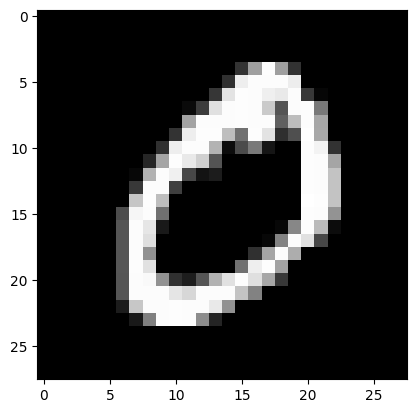

In [42]:
single_image = pixel_values.iloc[1, :].to_numpy().reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [45]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values.iloc[:3000, :])

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [55]:
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"]
)

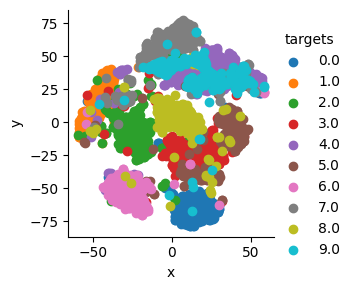

In [58]:
grid = sns.FacetGrid(tsne_df, hue="targets")
grid.map(plt.scatter, "x", "y").add_legend()

<function matplotlib.pyplot.show(close=None, block=None)>

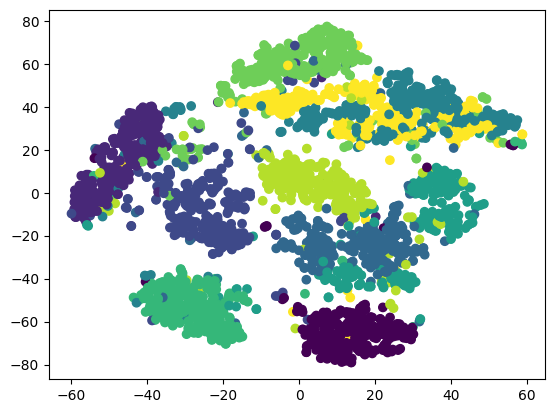

In [62]:
plt.scatter(tsne_df['x'],tsne_df['y'],c=tsne_df['targets'])
plt.show